# Salary prediction of recent graduates  by analyzing the 2021 National Survey of College Graduates  

# C. Design and development

**Student name:** Daniel Santiago Sandoval Higuera   
**Student ID:** 012366219   

**University:** Western Governors University   
**Class:** Computer Science Capstone   

This project aims to predict the potential salary of recent graduates by analyzing the 2021 National Survey of College Graduates data obtained from the National Center for Science and Engineering Statistics (NCSES) website. [https://ncses.nsf.gov/explore-data/microdata/national-survey-college-graduates](https://ncses.nsf.gov/explore-data/microdata/national-survey-college-graduates)


# Phase 1: Business Understanding
This project will develop a forecasting tool for CannBank to predict the potential salary of recent graduates who do not yet have a job or just started their first job. This tool will utilize machine learning predictive models to analyze the 2021 National Survey of College Graduates dataset obtained from the National Center for Science and Engineering Statistics (NCSES). The predicted salary will serve as an input for CannBank’s loan application system, allowing for better-informed financial decisions regarding loan approvals.


The Fair Housing Act (FHA) and the Equal Credit Opportunity Act (ECOA) protect consumers by prohibiting unfair and discriminatory practices; this includes not discriminating by race, national origin, sex, or marital status (Office of the Comptroller of the Currency, n.d.). So, we will ensure not to include this information in the predictions made by the machine learning model. Note: Age is a significant factor for potential income, so it will be used to evaluate the potential income that may help determine the default risk of a loan. (it won’t be used as an exclusion factor in the final decision by the analysts as they come to analyze the person's specific situation more in-depth before deciding about approving a loan).

**Please refer to the Project Proposal Plan for more details**

# Phase 2: Data Understanding
Download, clean, and explore the 2021 National Survey of College Graduate data files obtained from the National Center for Science and Engineering Statistics (NCSES) website. The descriptive method will be used here.

## Download  and load the raw data
The following steps were taken to load the data into Python.

1. Download the ZIP file corresponding to the data from the National Survey of College Graduates made in the year 2021 by the National Center for Science and Engineering Statistics (NCSES) website.[https://ncses.nsf.gov/explore-data/microdata/national-survey-college-graduates](https://ncses.nsf.gov/explore-data/microdata/national-survey-college-graduates)
2. Extract the ZIP.
3. Import pandas and read  the .sas7bdat file from the extracted folder (which contains the data in SAS format) using Pandas read_sas function.

**Download and extract:**

In [ ]:
!wget "https://ncses.nsf.gov/822/assets/0/files/college_grads_2021.zip" -O college_grads_2021.zip
!unzip college_grads_2021.zip

--2025-02-28 05:05:54--  https://ncses.nsf.gov/822/assets/0/files/college_grads_2021.zip
Resolving ncses.nsf.gov (ncses.nsf.gov)... 128.150.221.92, 2620:10f:6002:221::92
Connecting to ncses.nsf.gov (ncses.nsf.gov)|128.150.221.92|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 48743965 (46M) [application/zip]
Saving to: ‘college_grads_2021.zip’

college_grads_2021. 100%[===================>]  46.49M  19.3MB/s    in 2.4s    

2025-02-28 05:05:59 (19.3 MB/s) - ‘college_grads_2021.zip’ saved [48743965/48743965]

Archive:  college_grads_2021.zip
  inflating: pcg21Public/2021NewCohortAnnotated21.pdf  
  inflating: pcg21Public/2021NRCohortAnnotated23.pdf  
  inflating: pcg21Public/2021NSCGRecodeDocumentation.pdf  
  inflating: pcg21Public/2021OldCohortAnnotated22.pdf  
  inflating: pcg21Public/contacts.html  
  inflating: pcg21Public/Dpcg21.xlsx  
  inflating: pcg21Public/EPCG21.DAT  
  inflating: pcg21Public/epcg21.sas7bdat  
  inflating: pcg21Public/Fpcg21.sas  
   c

In [ ]:
import pandas as pd # tool used to work with dataframes

In [ ]:
import pandas as pd

df = pd.read_sas("pcg21Public/epcg21.sas7bdat", format="sas7bdat")
df = df.map(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
df.head()

,ACADV,ACCAR,ACCCEP,ACCHG,ACDRG,ACEM,ACFPT,ACGRD,ACINT,ACLIC,...,WRKGP,WTRCHOC,WTREASN,WTREM,WTRLIC,WTROPPS,WTROT,WTRPERS,WTRSKL,WTSURVY
0,L,L,L,L,L,L,L,L,L,L,...,Y,Y,5,Y,Y,Y,N,N,Y,1773.4187
1,L,L,L,L,L,L,L,L,L,L,...,Y,Y,1,N,Y,Y,N,N,Y,91.5643
2,L,L,L,L,L,L,L,L,L,L,...,Y,N,1,N,Y,N,N,Y,Y,943.7777
3,Y,Y,Y,N,2,N,2,N,Y,N,...,Y,N,1,N,N,N,N,N,Y,470.5196
4,L,L,L,L,L,L,L,L,L,L,...,Y,L,L,L,L,L,L,L,L,6173.4583


In [ ]:
print(f"The dataframe contains {df.shape[1]} columns and {df.shape[0]} rows. ")

The dataframe contains 537 columns and 106279 rows. 


## Understand the files accompanying the data
To understand the data, we need to take into account the following files included inside the extracted ZIP folder from the download step:

- The `Dpcg21.xlsx` file contains an explanation of the meaning of the columns of the data frame.
- The `Ppcg21.sas` file contains the meaning of the values inside every column row. (The values loaded previously are encoded to reduce the size of the transmission file)


**Because the data frame has 537 different columns relevant to the business case, a subset of columns will be selected as potential variables to use. Later, while exploring the data, a better understanding of these columns will be obtained to select the best inputs for the model.**

### The file `Dpcg21.xlsx` is read to give more descriptive names to columns and identify the column value mapping


In [ ]:
df_info = pd.read_excel("pcg21Public/Dpcg21.xlsx")
df_info.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,SAS_NAME,SESTAT_NAME,DESCRIPTION,SOURCE,QUESTION,DOMAIN,SAS_FMT
0,ACADV,N_ED_REF_WK_ENROLL_REAS_ADVANCEMT,Reason for taking courses during reference wee...,CG0: D15.6/CGN: D19.6/CGNR: E15.6,For which of the following reasons were you ta...,Took courses/enrolled in college/university du...,$YES_NO_CODES
1,ACCAR,N_ED_REF_WK_ENROLL_REAS_BEGIN_CAREER,Reason for taking courses during reference wee...,CG0: D15.1/CGN: D19.1/CGNR: E15.1,For which of the following reasons were you ta...,Took courses/enrolled in college/university du...,$YES_NO_CODES
2,ACCCEP,N_ED_REF_WK_EMP_ASSISTANCE,School related costs for course taking paid by...,CG0: D16/CGN: D20/CGNR: E16,Were any of your school-related costs for taki...,Took courses/enrolled in college/university du...,$YES_NO_CODES
3,ACCHG,N_ED_REF_WK_ENROLL_REAS_CHG_FLD,Reason for taking courses during reference wee...,CG0: D15.3/CGN: D19.3/CGNR: E15.3,For which of the following reasons were you ta...,Took courses/enrolled in college/university du...,$YES_NO_CODES
4,ACDRG,N_ED_REF_WK_WORK_DEGREE,Type of degree working on during reference week,CG0: D12/CGN: D16/CGNR: E12,Toward what degree were you working?,Took courses/enrolled in college/university du...,$DEGREE_CODES


In [ ]:
df_info[df_info["SAS_NAME"] == "EARN"]

,SAS_NAME,SESTAT_NAME,DESCRIPTION,SOURCE,QUESTION,DOMAIN,SAS_FMT
208,EARN,H_JOB_TOTAL_INCOME,Total earned income before deductions in previ...,CG0: A38/CGN: A38/CGNR: A38,"Counting all jobs held in 2018, what was your ...",Worked during calendar year 2018,NUMERIC_DOLLAR_SEVEN


In [ ]:
# rename columns
column_name_map = df_info.set_index("SAS_NAME")["SESTAT_NAME"].to_dict()

# rename column names by using the SESTAT_NAME
df.rename(columns=column_name_map, inplace=True)
df.head()


,N_ED_REF_WK_ENROLL_REAS_ADVANCEMT,N_ED_REF_WK_ENROLL_REAS_BEGIN_CAREER,N_ED_REF_WK_EMP_ASSISTANCE,N_ED_REF_WK_ENROLL_REAS_CHG_FLD,N_ED_REF_WK_WORK_DEGREE,N_ED_REF_WK_ENROLL_REAS_EMPR_REQ,N_ED_REF_WK_ENROLL_FT_PT_IND,N_ED_REF_WK_ENROLL_REAS_PREP_GRAD_SCHL,N_ED_REF_WK_ENROLL_REAS_PERSONL,N_ED_REF_WK_ENROLL_REAS_LICENSING,...,D_JOB_EMPLOYED_IND,G_JOB_TRAINING_REAS_CHG_OCCUPAT_DIF,G_JOB_TRAINING_PRIMARY_REASON,G_JOB_TRAINING_REAS_EMPLR_REQ,G_JOB_TRAINING_REAS_LICENSING,G_JOB_TRAINING_REAS_OPPS_ADV_SALARY,G_JOB_TRAINING_REAS_OTHR,G_JOB_TRAINING_REAS_PERS,G_JOB_TRAINING_REAS_ACQ_SKILL,Z_WEIGHTING_FACTOR_SURVEY
0,L,L,L,L,L,L,L,L,L,L,...,Y,Y,5,Y,Y,Y,N,N,Y,1773.4187
1,L,L,L,L,L,L,L,L,L,L,...,Y,Y,1,N,Y,Y,N,N,Y,91.5643
2,L,L,L,L,L,L,L,L,L,L,...,Y,N,1,N,Y,N,N,Y,Y,943.7777
3,Y,Y,Y,N,2,N,2,N,Y,N,...,Y,N,1,N,N,N,N,N,Y,470.5196
4,L,L,L,L,L,L,L,L,L,L,...,Y,L,L,L,L,L,L,L,L,6173.4583


In [ ]:
# obtain info_dict with new column names as key, and additional information about columns as values.
info_dict = df_info.set_index("SESTAT_NAME").to_dict(orient="index")

# example of info_dic use
info_dict["N_ED_REF_WK_ENROLL_REAS_ADVANCEMT"]

{'SAS_NAME': 'ACADV',
 'DESCRIPTION': 'Reason for taking courses during reference week: increase advancement opportunities',
 'SOURCE': 'CG0: D15.6/CGN: D19.6/CGNR: E15.6',
 'QUESTION': 'For which of the following reasons were you taking courses or enrolled? (Response to: To increase opportunities for promotion, advancement or higher salary)',
 'DOMAIN': 'Took courses/enrolled in college/university during the week of February 1, 2021',
 'SAS_FMT': '$YES_NO_CODES'}

### The file `Ppcg21.sas` is read to give more descriptive values to every row cell

`SAS_FMT` value fron the info dict will be used to get the values mappings of the columns.

For example if a colum information inside the `info_dict` has `'SAS_FMT' ='$YES_NO_CODES'` then the value mappings to taken from the `Ppcg21.sas` file are:
- "E"	= "E: Erroneously Missing Due to Instrument Error"
- "L"	= "L: Logical Skip"
- "M"	= "M: Missing"
- "N"	= "N: No"
- "Y"	= "Y: Yes"

These new mappings will be used to create a more understandable dataframe.

In [ ]:

import re # library to identify patterns in text (.sas file)

with open("pcg21Public/Ppcg21.sas", "r") as file:
    sas_code = file.read()

# Use regex to find all SAS "VALUE" format definitions in the SAS file content
# Captures the format name (e.g., "educfmt") and  corresponding mappings (e.g., `1 = "No formal education"`)
matches = re.findall(r'VALUE\s+\$?(\w+)\s+([\s\S]+?)\s*;', sas_code, re.MULTILINE)
format_dict = {}
for name, values in matches:
    mapping = {}

    # Extract key value that corresponds to current value in a cell to the new value to be used
    pairs = re.findall(r'"([^"]+)"\s*=\s*"([^"]+)"|(\d+)\s*=\s*"([^"]+)"', values)

    # for value choice
    for str_key, str_label, num_key, num_label in pairs:
        if str_key:  # Character-based values
            mapping[str_key] = str_label
        elif num_key:  # Numeric values
            mapping[str(num_key)] = num_label

    # Store the mapping in the main dictionary with the format name as the key
    format_dict[name] = mapping

# Remove mappings that have less than 2 categories to prevent converting numeric fields into categorical fields
format_dict = {key: value for key, value in format_dict.items() if len(value) >= 2}


print(" Columns I consider need no transformation: ".center(100, "-"))

# Apply format mappings to matching columns
for column in df.columns:
    desired_cell_values = str(info_dict[column]["SAS_FMT"]).replace("$", "")  # Remove '$' if present
    if desired_cell_values in format_dict:
        df[column] = df[column].map(lambda x: format_dict[desired_cell_values].get(x, x))  # Keep original if not found
    else:
        print(f"{column}: not modified because SAS_FMT '{desired_cell_values}' code meaning not found, is numeric, or single category.")

---------------------------- Columns I consider need no transformation: ----------------------------
U_DEM_AGE: not modified because SAS_FMT 'nan' code meaning not found, is numeric, or single category.
J_ED_BA_DEGREE_AWARD_ACADEMIC_YR: not modified because SAS_FMT 'NUMERIC_FOUR' code meaning not found, is numeric, or single category.
J_ED_BA_DEGREE_AWARD_YR: not modified because SAS_FMT 'NUMERIC_FOUR' code meaning not found, is numeric, or single category.
U_DEM_BIRTH_DATE_YR: not modified because SAS_FMT 'nan' code meaning not found, is numeric, or single category.
J_ED_BA_AND_ABOVE_DEGREE_NBR: not modified because SAS_FMT 'nan' code meaning not found, is numeric, or single category.
W_DEM_CHILDREN_NBR_12_18: not modified because SAS_FMT 'NUMERIC_TWO' code meaning not found, is numeric, or single category.
W_DEM_CHILDREN_NBR_19: not modified because SAS_FMT 'NUMERIC_TWO' code meaning not found, is numeric, or single category.
W_DEM_CHILDREN_NBR_2_5: not modified because SAS_FMT 'NUME

In [ ]:
# modified datqaframe
df.head()

,N_ED_REF_WK_ENROLL_REAS_ADVANCEMT,N_ED_REF_WK_ENROLL_REAS_BEGIN_CAREER,N_ED_REF_WK_EMP_ASSISTANCE,N_ED_REF_WK_ENROLL_REAS_CHG_FLD,N_ED_REF_WK_WORK_DEGREE,N_ED_REF_WK_ENROLL_REAS_EMPR_REQ,N_ED_REF_WK_ENROLL_FT_PT_IND,N_ED_REF_WK_ENROLL_REAS_PREP_GRAD_SCHL,N_ED_REF_WK_ENROLL_REAS_PERSONL,N_ED_REF_WK_ENROLL_REAS_LICENSING,...,D_JOB_EMPLOYED_IND,G_JOB_TRAINING_REAS_CHG_OCCUPAT_DIF,G_JOB_TRAINING_PRIMARY_REASON,G_JOB_TRAINING_REAS_EMPLR_REQ,G_JOB_TRAINING_REAS_LICENSING,G_JOB_TRAINING_REAS_OPPS_ADV_SALARY,G_JOB_TRAINING_REAS_OTHR,G_JOB_TRAINING_REAS_PERS,G_JOB_TRAINING_REAS_ACQ_SKILL,Z_WEIGHTING_FACTOR_SURVEY
0,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,...,Y: Yes,Y: Yes,5: Required or expected by employer,Y: Yes,Y: Yes,Y: Yes,N: No,N: No,Y: Yes,1773.4187
1,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,...,Y: Yes,Y: Yes,1: To improve skills or knowledge in your curr...,N: No,Y: Yes,Y: Yes,N: No,N: No,Y: Yes,91.5643
2,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,...,Y: Yes,N: No,1: To improve skills or knowledge in your curr...,N: No,Y: Yes,N: No,N: No,Y: Yes,Y: Yes,943.7777
3,Y: Yes,Y: Yes,Y: Yes,N: No,2: Master''s,N: No,2: Part-time student in a degree program,N: No,Y: Yes,N: No,...,Y: Yes,N: No,1: To improve skills or knowledge in your curr...,N: No,N: No,N: No,N: No,N: No,Y: Yes,470.5196
4,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,...,Y: Yes,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,L: Logical Skip,6173.4583


### Exploring the data

In [ ]:
def explore_SESTAT_NAME(name):
    """
    Use this function to explore the columns
    """
    print(f"SESTAT_NAME {name}: ".center(90, "-"))
    for key, value in info_dict[name].items():
        print(f"{key}: {value}")

    cell_value_type = str(info_dict[name]["SAS_FMT"]).replace("$", "")

    if cell_value_type in format_dict:
        values_list = list(format_dict[cell_value_type].values())
        print("Values: ".center(70, "-"))

        if len(values_list) > 6:
            displayed_values = values_list[:6]  # Show only first 6
            remaining_count = len(values_list) - 6
            for value in displayed_values:
                print(" -", value)
            print(f"... ({remaining_count} more) ...")
        else:
            for value in values_list:
                print(" -", value)
    else:
        print("Values: No categories provided".center(20))

explore_SESTAT_NAME("W_DEM_MARITAL_STATUS")

def get_column_description(column_name):
    '''
    Use this function to get a longer description of columns
    '''
    if column_name in info_dict.keys():
        return info_dict[column_name]["DESCRIPTION"]
    else:
        None

print(get_column_description("W_DEM_MARITAL_STATUS"))

----------------------------SESTAT_NAME W_DEM_MARITAL_STATUS: ----------------------------
SAS_NAME: MARSTA
DESCRIPTION: Marital status
SOURCE: CG0: E01/CGN: E01/CGNR: F01
QUESTION: On February 1, 2021 were you... (Response to: marital status categories)...
DOMAIN: All respondents
SAS_FMT: $MARITAL_STATUS_CODES_R1_
-------------------------------Values: -------------------------------
 - 1: Married
 - 2: Living in a marriage-like relationship
 - 3: Widowed
 - 4: Separated
 - 5: Divorced
 - 6: Never married
Marital status



**Manual selection of the columns I may be potentially interested to use based on the column explanations from  `Dpcg21.xlsx` file and my bank bussiness understanding:**

`Biased columns that are prohibited by law are excluded`

In [ ]:
interest_input_columns = [
    "U_DEM_AGE",
    "K_ED_AA_DEGREE_IND",
    #"W_DEM_MARITAL_STATUS", # not used for regulation and ethical constrains
    "V_DEM_CITIZENSHIP_STATUS",
    "N_ED_GR_FINAN_SUPP_BORROWED_RANGE_AMT",
    #"U_DEM_GENDER", # not used for regulation and ethical constrains
    "L_ED_HS_SCHOOL_ST_CTRY_CD",
    "J_ED_BA_SCHOOL_ST_CTRY_CD",
    #"U_DEM_BIRTH_PLACE_ST_CNTRY_CD", # not used for regulation and ethical constrains
    "V_DEM_CITIZENSHIP_CNTRY_CD",
    "V_LIVE_WORK_IN_US_ON_REF_DATE",
    "N_ED_REF_WK_WORK_DEGREE",
    "O_ED_HD_MAJOR_2ND_MAJ_ED_CAT_NEW2",
    "M_ED_MR_MAJOR_ED_CAT_NEW2",
    "C_JOB_LAST_JOB_CAT_NEW3",
    "B_JOB_CAT_NEW3",
    "E_JOB_EMPLR_NEW_BUSINESS",
    # "U_DEM_MULTIPLE_RACE_CAT", # not used for regulation and ethical constrains
    "D_JOB_CERT_LICEN_CODE",
    "N_ED_REF_WK_ENROLL_ED_CAT_NEW2",
    "E_JOB_EMPLR_NON_EDUC_INST_TYPE",
    "E_JOB_EMPLR_SIZE",
    "N_ED_REF_WK_ENROLL_ED_CAT_MAJOR_NEW",
    "J_ED_BA_SCHOOL_REGION",
    "U_DEM_BIRTH_DATE_YR",
]

for column in interest_input_columns:
    print()
    explore_SESTAT_NAME(column)


---------------------------------SESTAT_NAME U_DEM_AGE: ----------------------------------
SAS_NAME: AGE
DESCRIPTION: Age
SOURCE: CG0: SYSTEM/CGN: SYSTEM/CGNR: SYSTEM
QUESTION: Derived within SESTAT from reported information
DOMAIN: All respondents
SAS_FMT: nan
Values: No categories provided

-----------------------------SESTAT_NAME K_ED_AA_DEGREE_IND: -----------------------------
SAS_NAME: ASDGRI
DESCRIPTION: 2-Year Associate Degree
SOURCE: CG0: RECODE/CGN: D07/CGNR: RECODE
QUESTION: Do you have an associate's degree?
DOMAIN: All respondents
SAS_FMT: $YES_NO_CODES
-------------------------------Values: -------------------------------
 - E: Erroneously Missing Due to Instrument Error
 - L: Logical Skip
 - M: Missing
 - N: No
 - Y: Yes

--------------------------SESTAT_NAME V_DEM_CITIZENSHIP_STATUS: --------------------------
SAS_NAME: CTZN
DESCRIPTION: Citizenship or visa status
SOURCE: CG0: RECODE/CGN: RECODE/CGNR: RECODE
QUESTION: Derived within SESTAT from reported information
DOM

In [ ]:
interest_target_columns = [
    "H_JOB_TOTAL_INCOME",
    "H_JOB_SALARY_ANN"
]
for column in interest_target_columns:
    print()
    explore_SESTAT_NAME(column)


-----------------------------SESTAT_NAME H_JOB_TOTAL_INCOME: -----------------------------
SAS_NAME: EARN
DESCRIPTION: Total earned income before deductions in previous year
SOURCE: CG0: A38/CGN: A38/CGNR: A38
QUESTION: Counting all jobs held in 2018, what was your total earned income for 2018, before deductions?
DOMAIN: Worked during calendar year 2018
SAS_FMT: NUMERIC_DOLLAR_SEVEN
Values: No categories provided

------------------------------SESTAT_NAME H_JOB_SALARY_ANN: ------------------------------
SAS_NAME: SALARY
DESCRIPTION: Salary (annualized)
SOURCE: CG0: A30/CGN: A30/CGNR: A30
QUESTION: As of the week of February 1, 2021, what was your basic annual salary on your principal job, before deductions?
DOMAIN: Working during the week of February 1, 2021
SAS_FMT: NUMERIC_DOLLAR_SEVEN
Values: No categories provided


In [ ]:
df[interest_target_columns]

,H_JOB_TOTAL_INCOME,H_JOB_SALARY_ANN
0,110000.0,110000.0
1,43000.0,60000.0
2,60000.0,60000.0
3,111000.0,105000.0
4,20000.0,6000.0
...,...,...
106274,24000.0,24000.0
106275,12115.0,9999998.0
106276,16500.0,21000.0
106277,22731.0,21996.0


**The selected target** columnt to predict is `H_JOB_SALARY_ANN` as it is more up to date han the income according to the question details obtained by the `explore_SESTAT_NAME` function.

In [ ]:
target_column = "H_JOB_SALARY_ANN"

### Descriptive analysis and cleaning of data

In [ ]:
# 'Logical skip' cell values are treated as missing values
df.replace(re.compile(r'.*Logical skip.*', re.IGNORECASE), None, inplace=True)
# Check missing values
missing_values = df[interest_input_columns + [target_column]].isnull().sum()

print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 J_ED_BA_SCHOOL_ST_CTRY_CD              10929
V_DEM_CITIZENSHIP_CNTRY_CD             93864
N_ED_REF_WK_WORK_DEGREE                99273
O_ED_HD_MAJOR_2ND_MAJ_ED_CAT_NEW2      95506
C_JOB_LAST_JOB_CAT_NEW3                89903
B_JOB_CAT_NEW3                         17284
E_JOB_EMPLR_NEW_BUSINESS               17284
D_JOB_CERT_LICEN_CODE                  74381
N_ED_REF_WK_ENROLL_ED_CAT_NEW2         99985
E_JOB_EMPLR_NON_EDUC_INST_TYPE         17284
E_JOB_EMPLR_SIZE                       17284
N_ED_REF_WK_ENROLL_ED_CAT_MAJOR_NEW    99985
J_ED_BA_SCHOOL_REGION                  10929
dtype: int64


In [ ]:
# Set threshold (30% missing) (if column has more than 30% missing values then the column won't be used)
threshold = 0.3

# Calculate percentage of missing values
missing_percentage = df.isnull().mean()

# Select columns to keep (less than 30% missing)
columns_to_keep = missing_percentage[missing_percentage < threshold].index.tolist()

# Filter the DataFrame
df_subset = df[columns_to_keep]

# chanche missing values to be a more descriptive text
df_subset.fillna("Not applicable", inplace=True)

<ipython-input-18-bcbd922fb8e3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.fillna("Not applicable", inplace=True)


In [ ]:
# get the dataset with only the columns that had passed the missing values test
new_columns = existing_columns = list(set(interest_input_columns + [target_column]) & set(df_subset.columns))
df_subset = df_subset[existing_columns]

In [ ]:
# Exploring numeric variables
df_subset.describe()

,U_DEM_BIRTH_DATE_YR,U_DEM_AGE,H_JOB_SALARY_ANN
count,106279.000000,106279.000000,1.062790e+05
mean,1976.017670,44.063427,1.707570e+06
std,14.206655,14.207824,3.655063e+06
min,1945.000000,21.000000,0.000000e+00
25%,1964.000000,32.000000,6.000000e+04
50%,1980.000000,40.000000,9.726900e+04
75%,1988.000000,56.000000,1.650000e+05
max,1999.000000,75.000000,9.999998e+06


In [ ]:
# Graphing libraires
import matplotlib.pyplot as plt
import seaborn as sns

### Target variable: Annual Job Salary

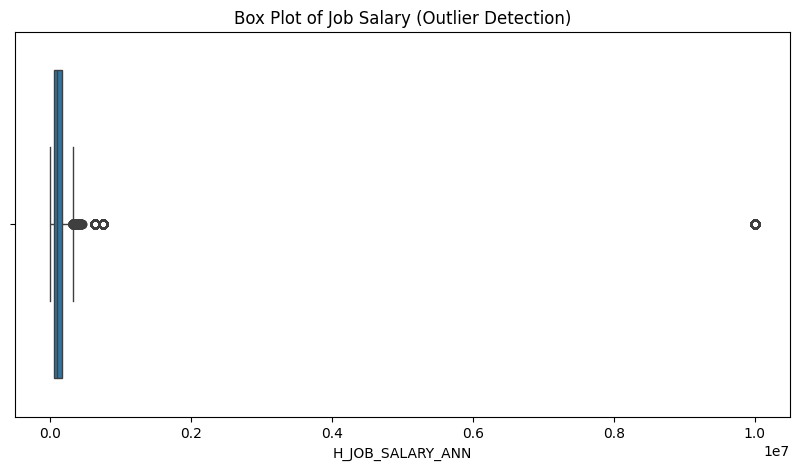

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_subset[target_column])
plt.title("Box Plot of Job Salary (Outlier Detection)")
plt.show()

In [ ]:
# eliminate outliers

# Salaries of more thank $150.000.000 will be ignored (treated as outliers) and they do not really contribute to a salary estimation of a recent graduate
df_subset = df_subset[df_subset[target_column] < 150000]

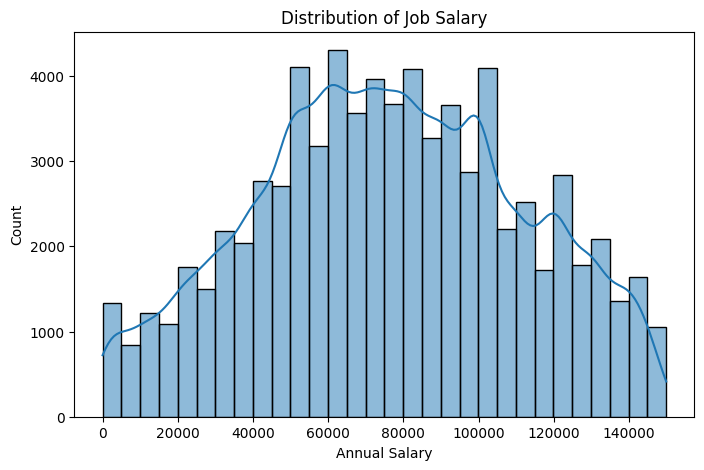

In [ ]:
# Distribution of Target Variable (H_JOB_SALARY_ANN)
plt.figure(figsize=(8, 5))
sns.histplot(df_subset[target_column], bins=30, kde=True)
plt.title("Distribution of Job Salary")
plt.xlabel("Annual Salary")
plt.show()

### Categorical variables:

In [ ]:
categorical_columns = df_subset.select_dtypes(include=['object', 'category']).columns # do not include numeric variables

In [ ]:
categorical_columns

Index(['V_DEM_CITIZENSHIP_STATUS', 'J_ED_BA_SCHOOL_ST_CTRY_CD',
       'N_ED_GR_FINAN_SUPP_BORROWED_RANGE_AMT', 'E_JOB_EMPLR_NEW_BUSINESS',
       'J_ED_BA_SCHOOL_REGION', 'K_ED_AA_DEGREE_IND',
       'M_ED_MR_MAJOR_ED_CAT_NEW2', 'E_JOB_EMPLR_NON_EDUC_INST_TYPE',
       'V_LIVE_WORK_IN_US_ON_REF_DATE', 'L_ED_HS_SCHOOL_ST_CTRY_CD',
       'E_JOB_EMPLR_SIZE', 'B_JOB_CAT_NEW3'],
      dtype='object')

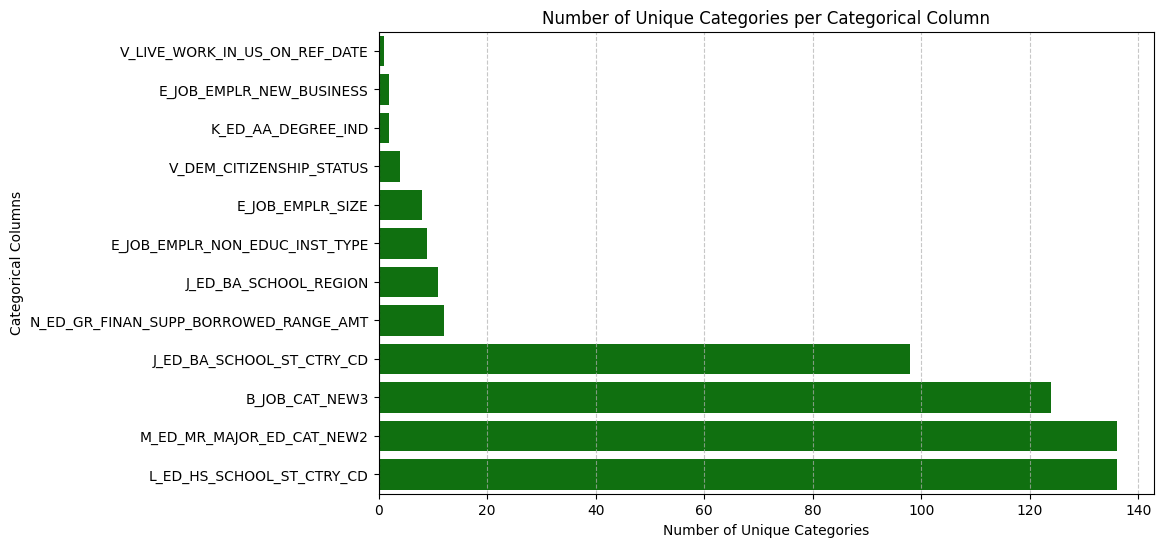

In [ ]:

# Count unique categories in each categorical column
category_counts = {col: df_subset[col].nunique() for col in categorical_columns}
category_counts_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Unique Categories'])
category_counts_df = category_counts_df.sort_values(by='Unique Categories', ascending=True)

# Plot as a horizontal bar chart that shows the number of categories per column
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts_df['Unique Categories'], y=category_counts_df.index, color="green")
plt.xlabel("Number of Unique Categories")
plt.ylabel("Categorical Columns")
plt.title("Number of Unique Categories per Categorical Column")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

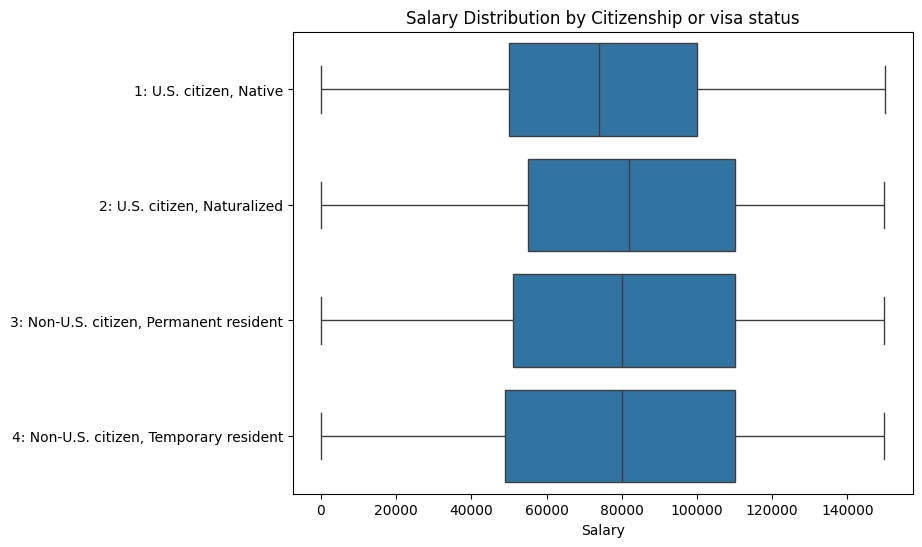

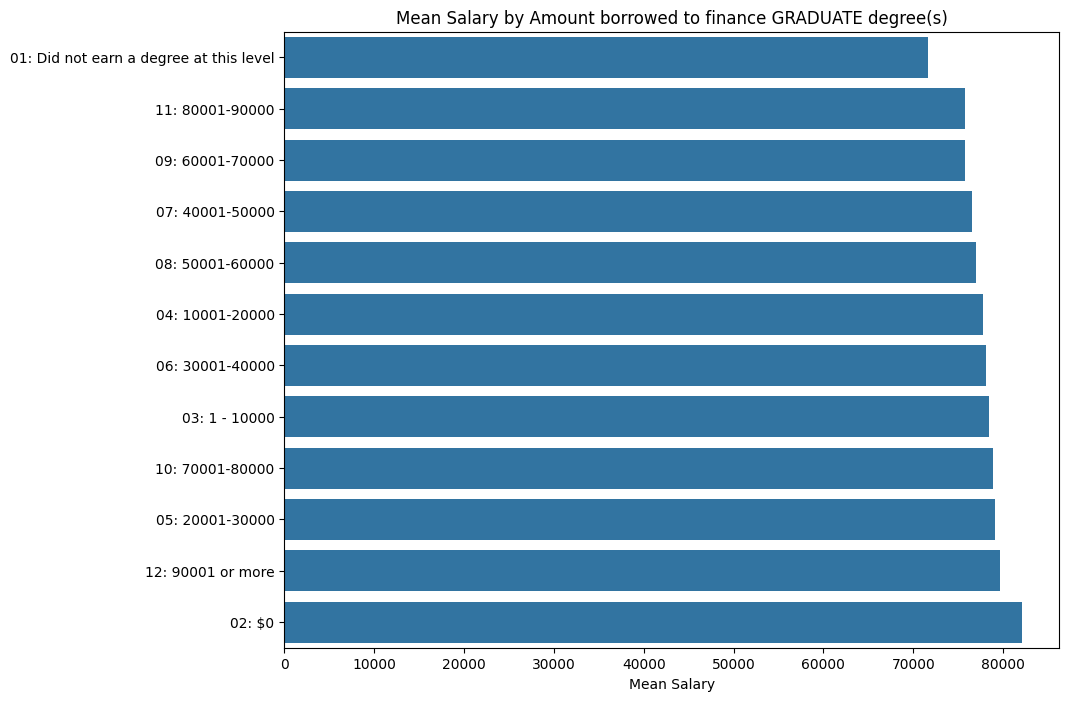

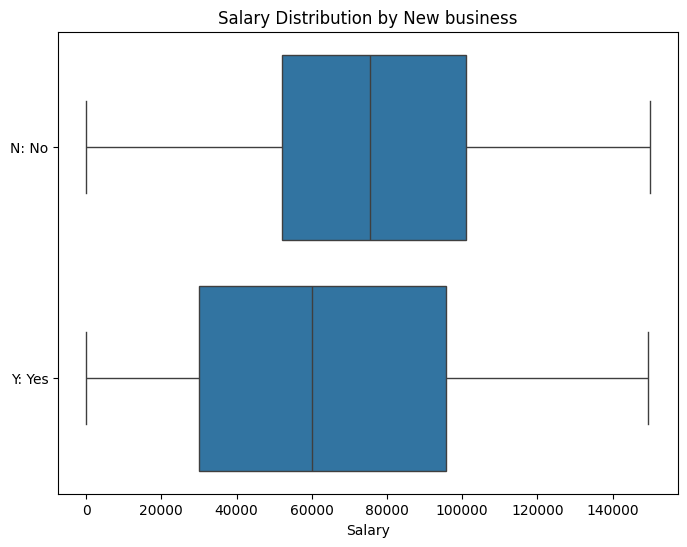

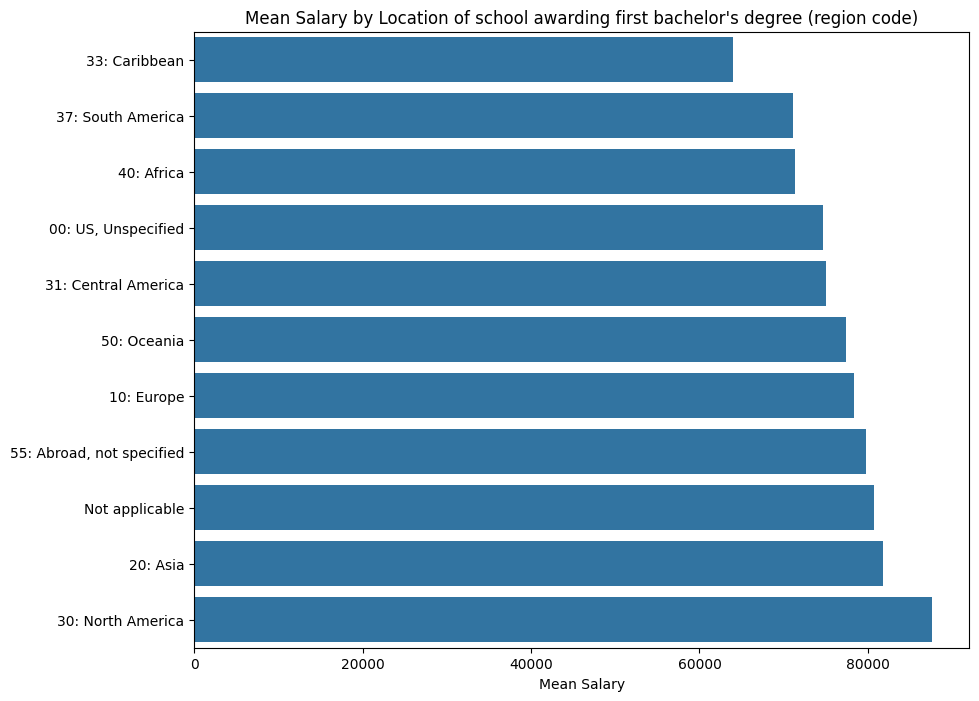

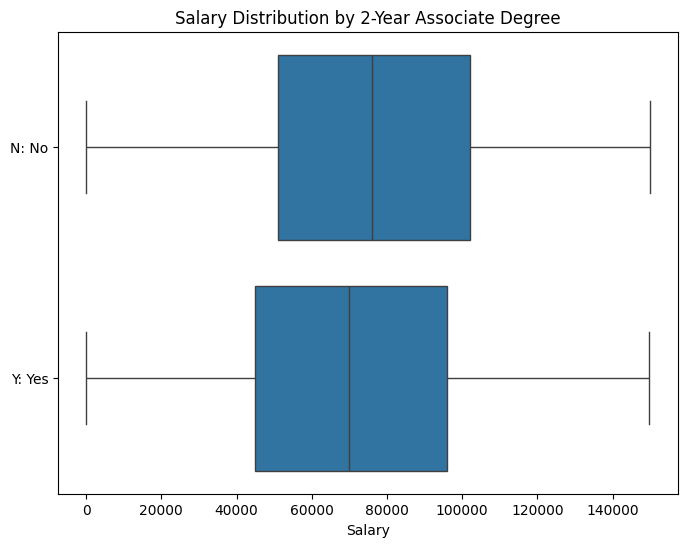

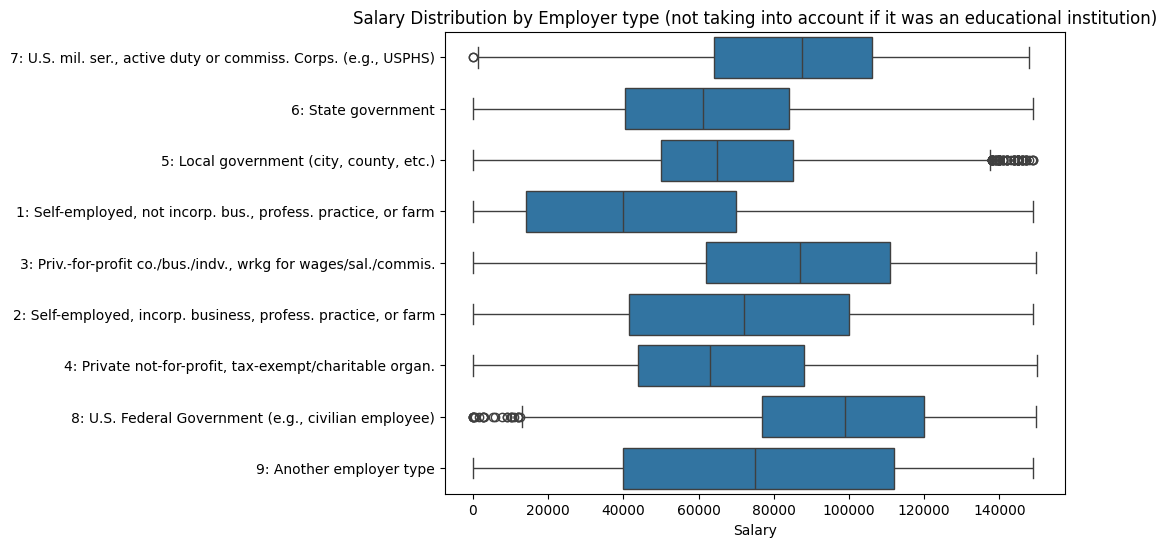

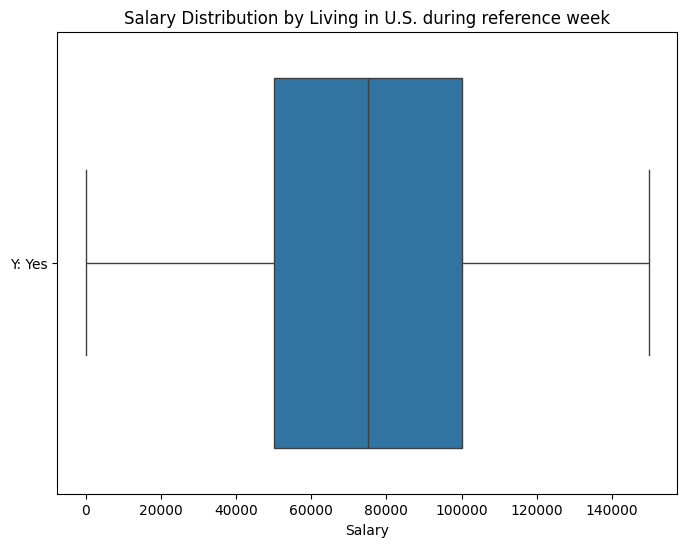

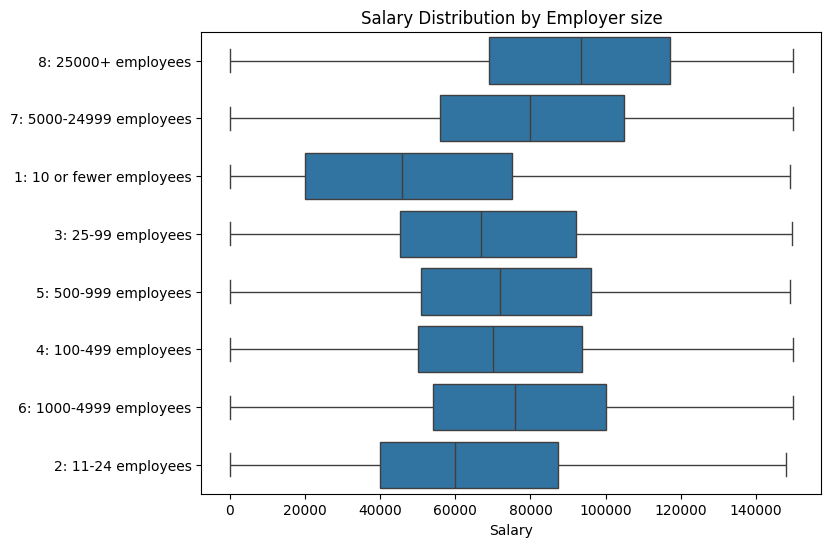

In [ ]:
# Loop through categorical columns and plot boxplots
for col in categorical_columns:
    if col in df_subset.columns:  # Ensure the column exists
        unique_categories = df_subset[col].nunique()

        if unique_categories < 10:
            # Boxplot for columns with fewer than 10 categories (horizontal)
            plt.figure(figsize=(8, 6))
            sns.boxplot(y=df_subset[col], x=df_subset[target_column])
            plt.ylabel("")
            plt.xlabel("Salary")
            plt.title(f"Salary Distribution by {get_column_description(col)}")
            plt.show()

        elif unique_categories < 30:
            # Horizontal bar plot of mean salary for columns with many categories
            plt.figure(figsize=(10, 8))
            category_means = df_subset.groupby(col)[target_column].mean().sort_values()
            sns.barplot(y=category_means.index, x=category_means.values)
            plt.ylabel("")
            plt.xlabel("Mean Salary")
            plt.title(f"Mean Salary by {get_column_description(col)}")
            plt.show()

### Numeric variables:

In [ ]:
numeric_columns = df_subset.select_dtypes(include=['number']).columns.tolist()


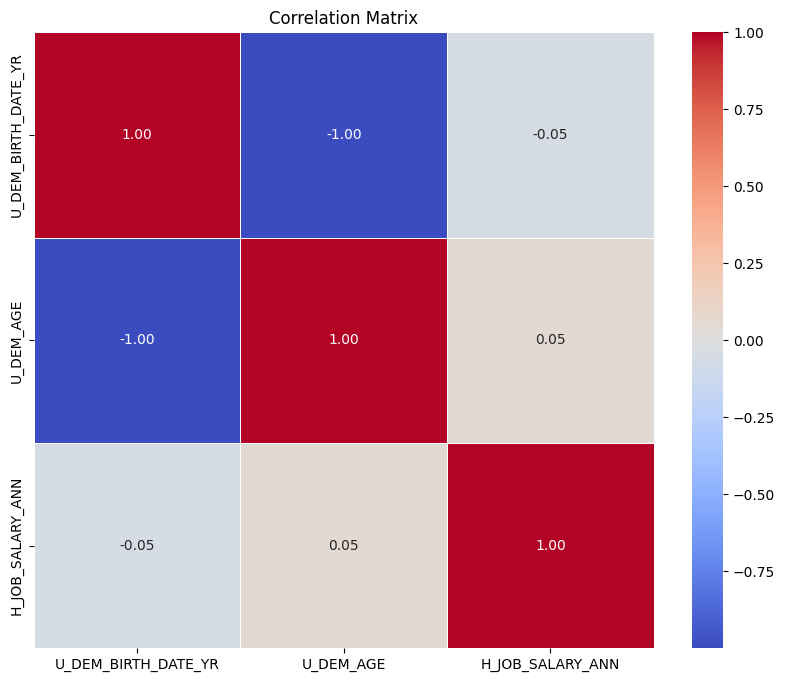

In [ ]:
# identify correlation of numeric colunns

numeric_columns = df_subset.select_dtypes(include=['number']).columns.tolist()
# Compute correlation matrix
correlation_matrix = df_subset[numeric_columns].corr()

plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
numeric_columns

['U_DEM_BIRTH_DATE_YR', 'U_DEM_AGE', 'H_JOB_SALARY_ANN']

<ipython-input-32-65aa28231184>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_salary = df_subset.groupby(f"{col}_binned")[target_column].mean()


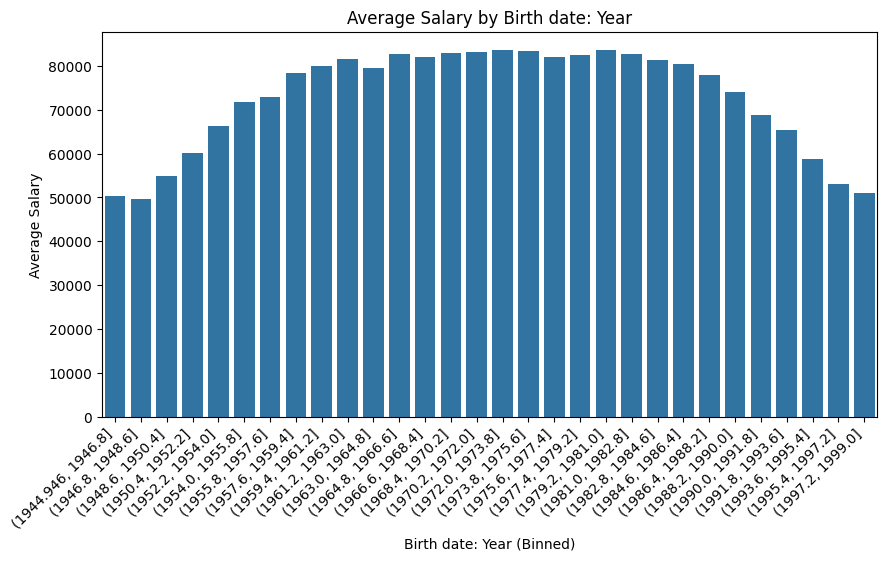

<ipython-input-32-65aa28231184>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_salary = df_subset.groupby(f"{col}_binned")[target_column].mean()


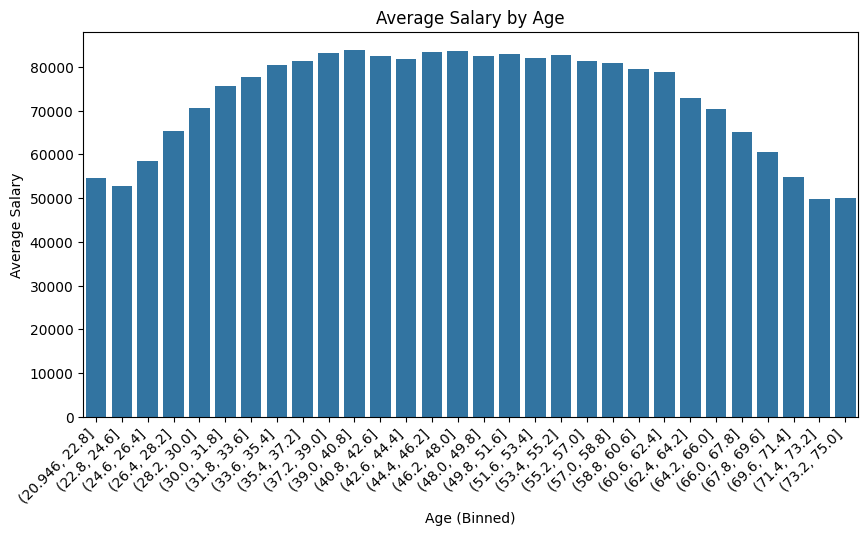

In [ ]:
# Remove the target column from the list (so we only plot predictors)
numeric_columns.remove(target_column)

# display bar charts
for col in numeric_columns:
    plt.figure(figsize=(10, 5))  # Adjust figure size
    # Bin the numerical column into 10 equal-sized bins
    df_subset[f"{col}_binned"] = pd.cut(df_subset[col], bins=30)
    # Calculate average salary for each bin
    binned_salary = df_subset.groupby(f"{col}_binned")[target_column].mean()
    # Plot bar chart
    sns.barplot(x=binned_salary.index.astype(str), y=binned_salary.values)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
    plt.xlabel(f"{get_column_description(col)} (Binned)")
    plt.ylabel("Average Salary")
    plt.title(f"Average Salary by {get_column_description(col)}")

    plt.show()

# delete created binned columns
for column in numeric_columns:
    df_subset.drop(column+"_binned", inplace=True, axis=1)

if "U_DEM_BIRTH_DATE_YR" in numeric_columns:
    # I identified that the birth date is practically equivalent to the age, so I decided to use only age.
    df_subset.drop("U_DEM_BIRTH_DATE_YR", inplace=True, axis=1)
    numeric_columns.remove("U_DEM_BIRTH_DATE_YR")


### Select top features to use

I will use a random forest regression prediction model that allow me to obtain an idea of the importance of each column in it's prediction.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables using Label Encoding  (Encode is used to prepare the inputs for the model)
df_encoded = df_subset.copy()
label_encoders = {}

for col in df_subset.select_dtypes(include=["object", "category"]).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoder for future use
categorical_columns = df_subset.select_dtypes(include=["object", "category"]).columns.tolist()

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df_encoded[categorical_columns], df_encoded[target_column])

feature_importances = pd.DataFrame({
    "Feature": categorical_columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importances.head(5)

,Feature,Importance
11,B_JOB_CAT_NEW3,0.302802
6,M_ED_MR_MAJOR_ED_CAT_NEW2,0.186766
9,L_ED_HS_SCHOOL_ST_CTRY_CD,0.129972
10,E_JOB_EMPLR_SIZE,0.125806
7,E_JOB_EMPLR_NON_EDUC_INST_TYPE,0.085801


In [ ]:
top_features = feature_importances["Feature"].head(5).tolist()

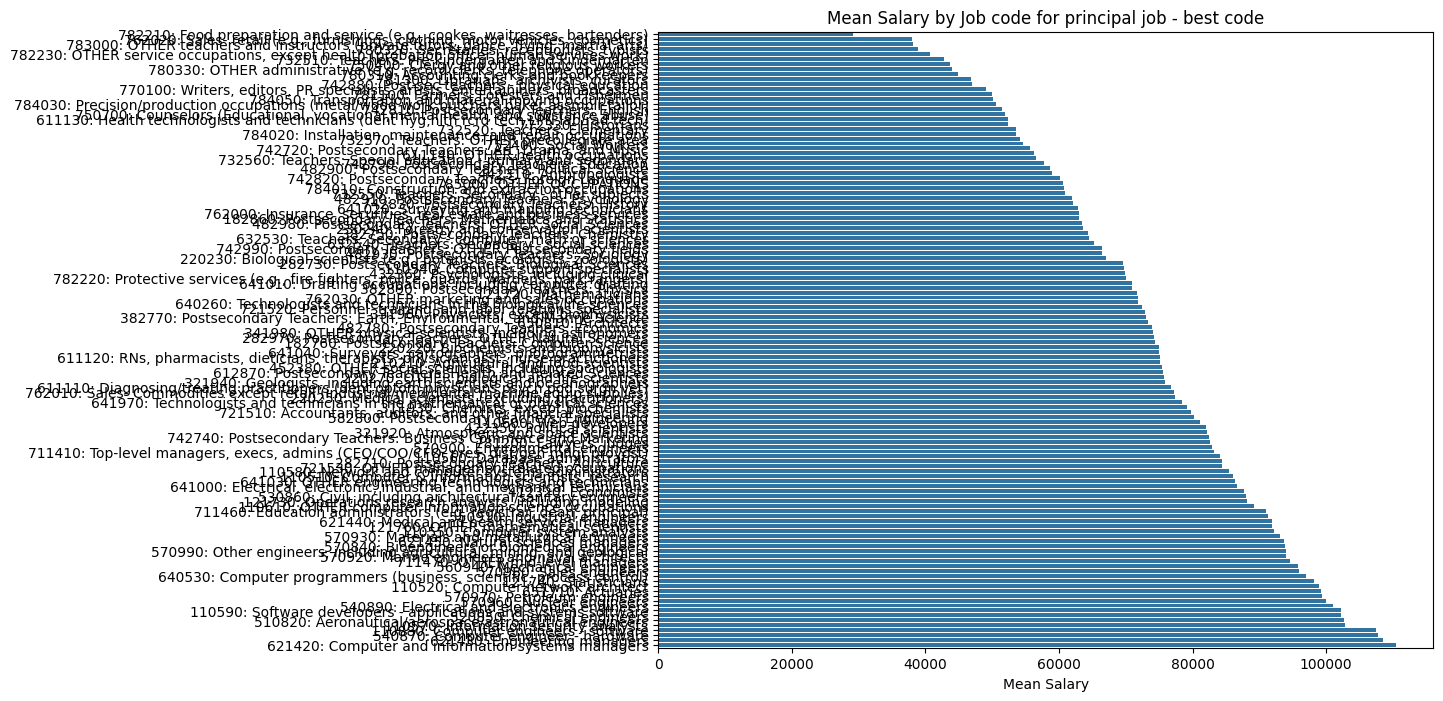

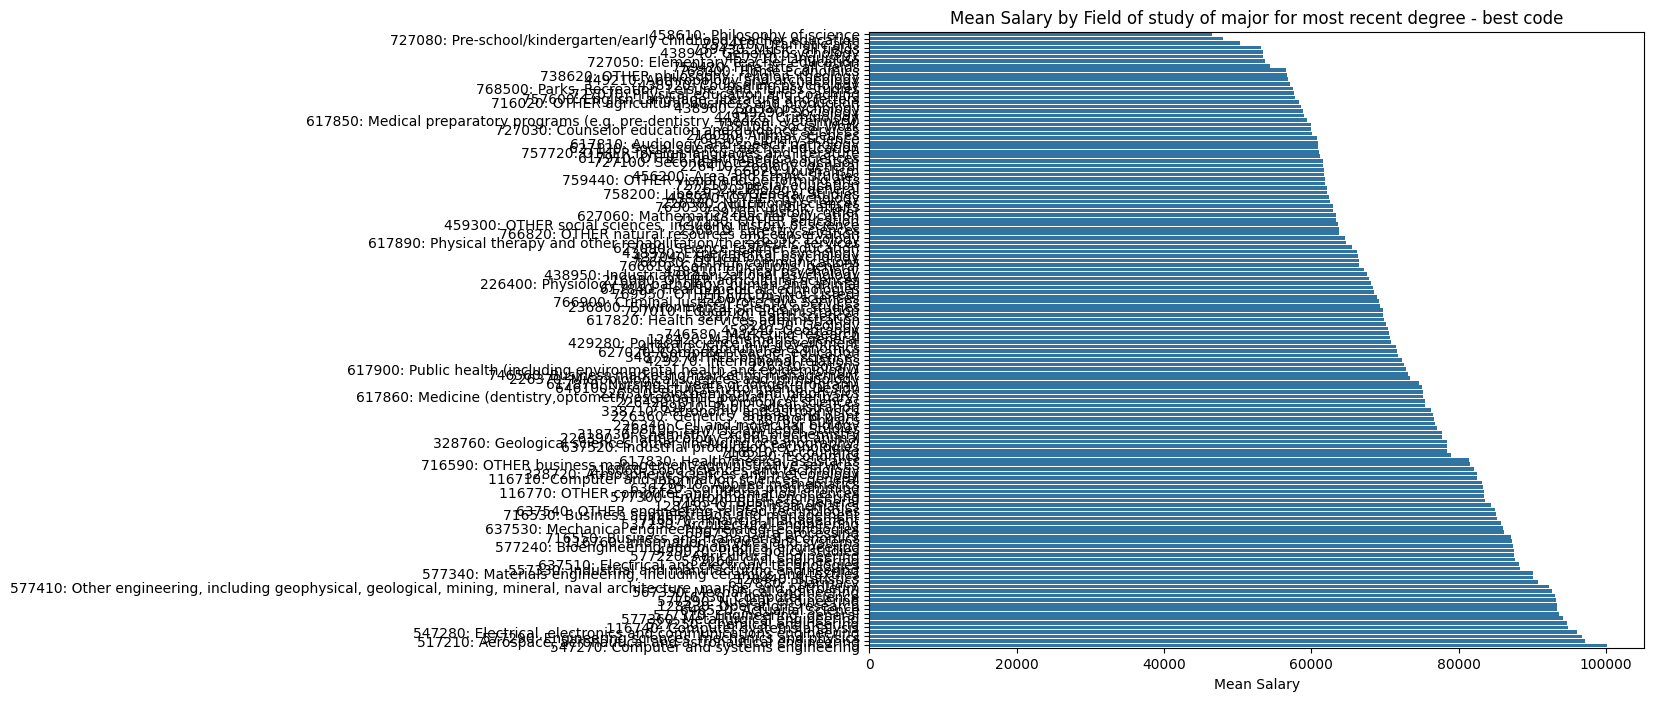

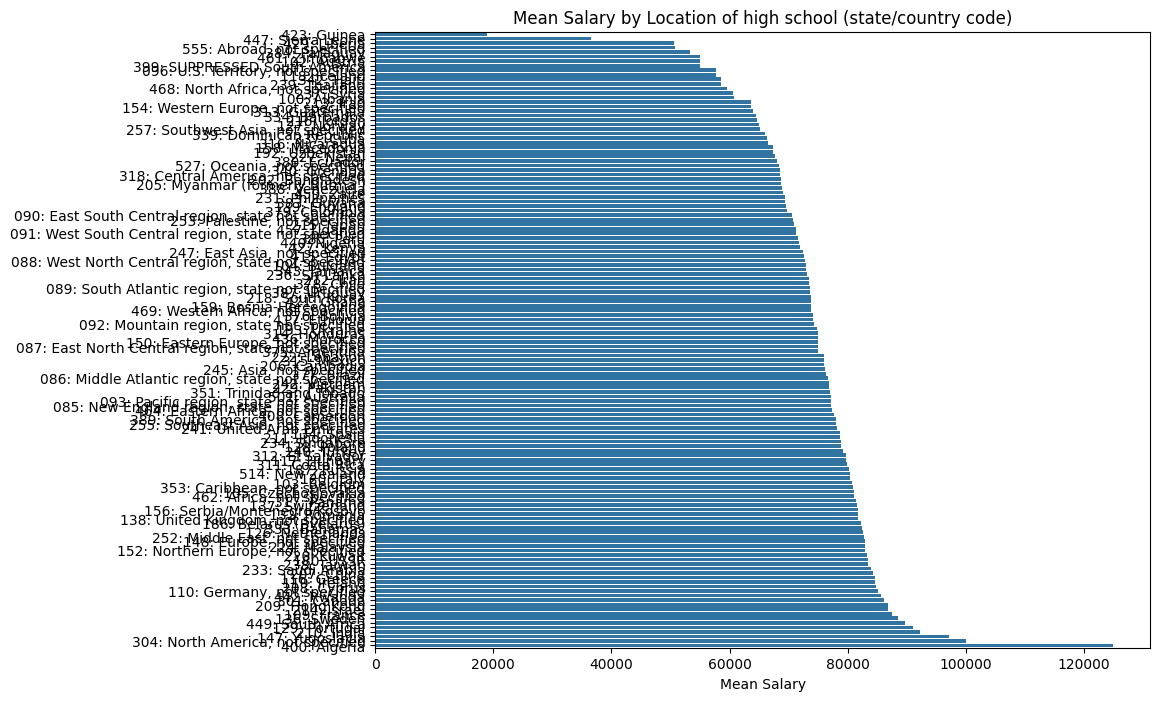

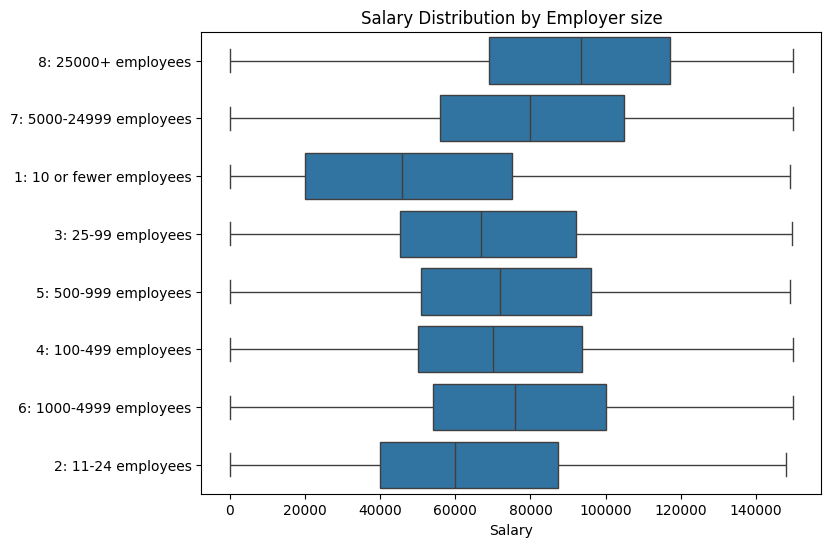

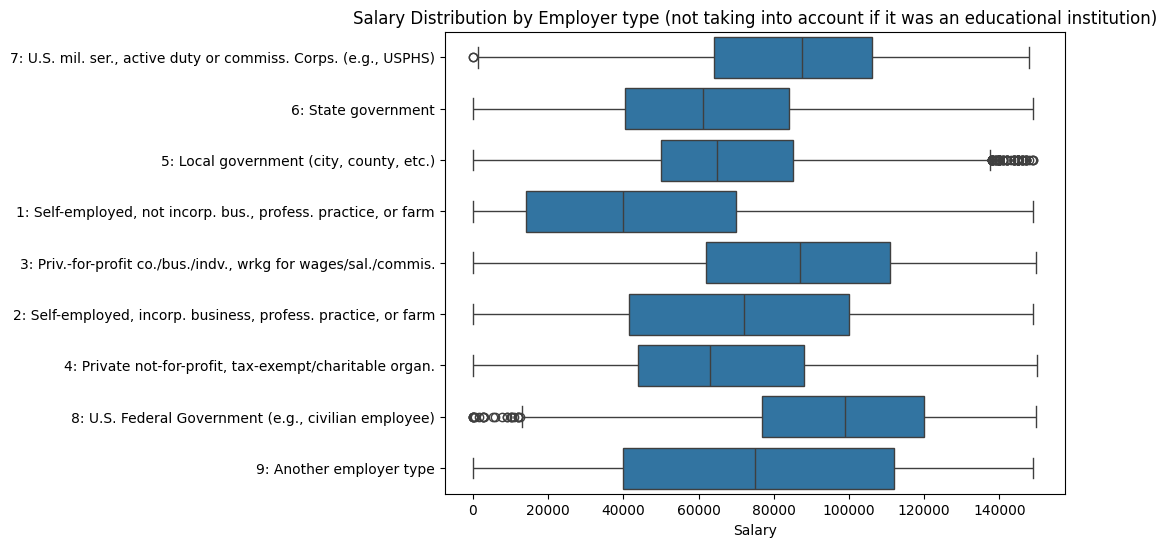

In [ ]:
for col in top_features:
    unique_categories = df_subset[col].nunique()

    if unique_categories < 10:
        # Boxplot for columns with fewer than 10 categories (horizontal)
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df_subset[col], x=df_subset[target_column])
        plt.ylabel("")
        plt.xlabel("Salary")
        plt.title(f"Salary Distribution by {get_column_description(col)}")
        plt.show()

    else:
        # Horizontal bar plot of mean salary for columns with many categories
        plt.figure(figsize=(10, 8))
        category_means = df_subset.groupby(col)[target_column].mean().sort_values()
        sns.barplot(y=category_means.index, x=category_means.values)
        plt.ylabel("")
        plt.xlabel("Mean Salary")
        plt.title(f"Mean Salary by {get_column_description(col)}")
        plt.show()

In [ ]:
df_subset.columns

Index(['V_DEM_CITIZENSHIP_STATUS', 'J_ED_BA_SCHOOL_ST_CTRY_CD',
       'N_ED_GR_FINAN_SUPP_BORROWED_RANGE_AMT', 'E_JOB_EMPLR_NEW_BUSINESS',
       'J_ED_BA_SCHOOL_REGION', 'K_ED_AA_DEGREE_IND', 'U_DEM_AGE',
       'M_ED_MR_MAJOR_ED_CAT_NEW2', 'E_JOB_EMPLR_NON_EDUC_INST_TYPE',
       'H_JOB_SALARY_ANN', 'V_LIVE_WORK_IN_US_ON_REF_DATE',
       'L_ED_HS_SCHOOL_ST_CTRY_CD', 'E_JOB_EMPLR_SIZE', 'B_JOB_CAT_NEW3'],
      dtype='object')

### Selected features

In [ ]:
# categorical features:
print(" CATEGORICAL FEATURES ".center(50,"-"))
for feature in top_features:
    print()
    explore_SESTAT_NAME(feature)


-------------- CATEGORICAL FEATURES --------------

-------------------------------SESTAT_NAME B_JOB_CAT_NEW3: -------------------------------
SAS_NAME: N3OCPR
DESCRIPTION: Job code for principal job - best code
SOURCE: CG0: A18/CGN: A18/CGNR: A18
QUESTION: Using the JOB CATEGORY list on pages [XX-XX], choose the code that best describes the principal job you held during the week of February 1, 2021. (Best code)
DOMAIN: Working during the week of February 1, 2021
SAS_FMT: $OCC19CNT
-------------------------------Values: -------------------------------
 - 110510: Computer & information scientists, research
 - 110520: Computer network architect
 - 110540: Computer support specialists
 - 110550: Computer system analysts
 - 110560: Database administrators
 - 110570: Information security analysts
... (120 more) ...

-------------------------SESTAT_NAME M_ED_MR_MAJOR_ED_CAT_NEW2: --------------------------
SAS_NAME: N2MRMED
DESCRIPTION: Field of study of major for most recent degree - best c

In [ ]:
# numeric features:
print(" NUMERIC FEATURES ".center(50,"-"))
for feature in numeric_columns:
    print()
    explore_SESTAT_NAME(feature)

---------------- NUMERIC FEATURES ----------------

---------------------------------SESTAT_NAME U_DEM_AGE: ----------------------------------
SAS_NAME: AGE
DESCRIPTION: Age
SOURCE: CG0: SYSTEM/CGN: SYSTEM/CGNR: SYSTEM
QUESTION: Derived within SESTAT from reported information
DOMAIN: All respondents
SAS_FMT: nan
Values: No categories provided


In [ ]:
# selected prediction column
explore_SESTAT_NAME(target_column)

------------------------------SESTAT_NAME H_JOB_SALARY_ANN: ------------------------------
SAS_NAME: SALARY
DESCRIPTION: Salary (annualized)
SOURCE: CG0: A30/CGN: A30/CGNR: A30
QUESTION: As of the week of February 1, 2021, what was your basic annual salary on your principal job, before deductions?
DOMAIN: Working during the week of February 1, 2021
SAS_FMT: NUMERIC_DOLLAR_SEVEN
Values: No categories provided


# Phase 3: Data Preparation

Prepare the data for the machine learning models by handling missing values, encoding categorical data, and normalizing numerical features.

1. Prepare data for machine learning models by  applying preprocessing pipelines: numerical data is imputed with the mean and standardized, while categorical data is imputed with the most frequent value and one-hot encoded. `ColumnTransformer`'s organize these steps.

1. The dataset is split into training and testing sets using an 80-20 split to enable model training and evaluation.

In [ ]:
!pip install xgboost
!pip install lightgbm

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
target_column

'H_JOB_SALARY_ANN'

In [ ]:
y = df_subset[target_column]
columns_to_use = top_features+["U_DEM_AGE"]
X = df_subset[columns_to_use]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define data processing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Separate validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Now:
# - X_train, y_train: 60% of the original data
# - X_val, y_val: 20% of the original data
# - X_test, y_test: 20% of the original data

# Phase 4-5: Modeling and Evaluation
Implement model selection process by evaluating different Gradient boosting models: **XGBoost, and LightGBM**, these models are able to use numeric and categorical inputs and produce a numeric prediction. The goal is to find the best-performing model based on **mean absolute error (MAE)**, the mean absolute error (MAE) give us a sense of the average error of the salary predictions, for example if the predicted salary is `$100.000` is probable that the real potential salary that the loan applicant will get is between `$80.000` and `$120.000`.

Each model has their own set of hyper parameters that could be used, to try out various hyper parameters and select the best, **grid search** was used.

To preprocess the feautes **scikit-learn pipeline** was used which calls the transformers defined in the **Data Preparation Phase**.


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


models = {
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'LightGBM': {
        'model': LGBMRegressor(random_state=42),
        'params': {'n_estimators': [300, 400], 'learning_rate': [0.01, 0.1]}
    }
}

results = {}
for name, config in models.items():
    best_score = np.inf
    best_params = None

    for params in ParameterGrid(config['params']):
        print(name, config)
        model = config['model'].set_params(**params)
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        # Cross-validation
        #scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
        #mean_score = scores.mean()
        mean_score = mean_absolute_error(y_test, y_pred)
        print("mean_absolute_error", mean_score)

        if mean_score < best_score:
            best_score = mean_score
            best_params = params

    # Train best model on full train set
    best_model = config['model'].set_params(**best_params)
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results[name] = {
        'Best Params': best_params,
        'R2 (CV Mean)': best_score,
        'R2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }



XGBoost {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...), 'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}}
mean_absolute_error 25331.815281778432
XGBoost {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_by

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


mean_absolute_error 22023.78520711068
LightGBM {'model': LGBMRegressor(learning_rate=0.01, n_estimators=300, random_state=42), 'params': {'n_estimators': [300, 400], 'learning_rate': [0.01, 0.1]}}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 45237, number of used features: 352
[LightGBM] [Info] Start training from score 75872.230762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


mean_absolute_error 21488.95871019913
LightGBM {'model': LGBMRegressor(learning_rate=0.01, n_estimators=400, random_state=42), 'params': {'n_estimators': [300, 400], 'learning_rate': [0.01, 0.1]}}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 45237, number of used features: 352
[LightGBM] [Info] Start training from score 75872.230762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


mean_absolute_error 20340.962583853587
LightGBM {'model': LGBMRegressor(n_estimators=300, random_state=42), 'params': {'n_estimators': [300, 400], 'learning_rate': [0.01, 0.1]}}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 45237, number of used features: 352
[LightGBM] [Info] Start training from score 75872.230762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


mean_absolute_error 20309.330348314357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 45237, number of used features: 352
[LightGBM] [Info] Start training from score 75872.230762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2 Score', ascending=False)
results_df

,Best Params,R2 (CV Mean),R2 Score,MAE,RMSE
XGBoost,"{'learning_rate': 0.1, 'n_estimators': 200}",20804.094544,0.439636,20804.094544,26570.276197
LightGBM,"{'learning_rate': 0.1, 'n_estimators': 400}",20309.330348,0.458295,20309.330348,26124.177967


### Get best model

In [ ]:

# Save the best model
best_model = LGBMRegressor(learning_rate=0.1, n_estimators=400, random_state=42)

pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', best_model)
        ])
# Train the model on the training data
pipe.fit(X_train, y_train)

# Validate the model using X_val and y_val
y_val_pred = pipe.predict(X_val)

# Evaluate performance on validation set
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))



# Store results
results = {
    'Validation R2': val_r2,
    'Validation MAE': val_mae,
    'Validation RMSE': val_rmse,
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Score'])

results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 45237, number of used features: 352
[LightGBM] [Info] Start training from score 75872.230762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Score
Validation R2,0.454703
Validation MAE,20137.910806
Validation RMSE,26002.019604


# Phase 6: Deployment
Integrate the model into a web application, allowing bank analysts to input loan applicant details and obtain salary predictions.

### Export the model

In [ ]:
# Export the model
import joblib
from pathlib import Path

# Save the best trained model
HF_dir = Path("Hugging_Face")
HF_dir.mkdir(parents=True, exist_ok=True)
joblib.dump(pipe, HF_dir / "best_model.pkl")
print("Best model saved successfully as 'best_model.pkl'")



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 60316, number of used features: 362
[LightGBM] [Info] Start training from score 75838.353737
Best model saved successfully as 'best_model.pkl'


,learning_rate,n_estimators
Best Params,0.100000,400.000000
R2 (CV Mean),20219.390671,20219.390671
R2 Score,0.463170,0.463170
MAE,20219.390671,20219.390671
RMSE,26006.353716,26006.353716


### Gradio Web Interface

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


#### Preparing the files to use in app.py which is on isolation from this notebook code

In [ ]:
final_columns = numeric_cols+categorical_cols
final_columns # add this to the Gradio app.py file

['U_DEM_AGE',
 'B_JOB_CAT_NEW3',
 'M_ED_MR_MAJOR_ED_CAT_NEW2',
 'L_ED_HS_SCHOOL_ST_CTRY_CD',
 'E_JOB_EMPLR_SIZE',
 'E_JOB_EMPLR_NON_EDUC_INST_TYPE']

In [ ]:
# save info_dict as a JSON file to deploy to Hugging Face
import json
for column in final_columns:
    info_dict[column]["Choices"] =df_subset[column].unique().tolist()

with open(HF_dir/"info_dict.json", "w") as json_file:
    json.dump(info_dict, json_file, indent=4)

#### Gradio interface (A final version of this can be found on `Hugging_Face/app.py`)

In [ ]:
# To deploy the code contained in this cell is copied to a

import joblib
from pathlib import Path
import gradio as gr
import json

#app.close() # Comment or uncomment as necesary. This is to make sure I do not open many copies of the same app in different ports
HF_dir = Path("Hugging_Face") # Path(".") if deploying in Hugging Face

# load model
model = joblib.load(HF_dir / "best_model.pkl")

final_columns = ['U_DEM_AGE',
 'B_JOB_CAT_NEW3',
 'M_ED_MR_MAJOR_ED_CAT_NEW2',
 'L_ED_HS_SCHOOL_ST_CTRY_CD',
 'E_JOB_EMPLR_SIZE',
 'E_JOB_EMPLR_NON_EDUC_INST_TYPE'] # numeric_cols+categorical_cols

# load info dict containing selection categories of the selected columns
with open(HF_dir/"info_dict.json", "r") as json_file:
    info_dict = json.load(json_file)


# Define the prediction function
def predict_salary(*inputs):
    # Convert inputs into a DataFrame
    input_data = {name: [value] for name, value in zip(final_columns, inputs)}
    df = pd.DataFrame(input_data)

    # Transform data before prediction
    df_transformed = model.named_steps['preprocessor'].transform(df)
    prediction = model.named_steps['model'].predict(df_transformed)

    return f"Predicted Salary: ${prediction[0]:,.2f}"


inputs = (
    [gr.Number(label=info_dict[final_columns[0]]["DESCRIPTION"], value=23)]+
    [gr.Dropdown(choices=info_dict[column]["Choices"], label=f'{info_dict[column]["DESCRIPTION"]} - (Actual or expected in the next three months)') for column in final_columns[1:]]  # Drop-downs
)


app = gr.Interface(
    fn=predict_salary,
    inputs=inputs,
    outputs="text",
    title="Salary Prediction App",
    description="Enter your details to predict the loan applicant potential salary. If something does not apply to the applicant select 'Not applicable' or the most possible option to happen in the next months."
)

app.launch()
# use app.close() to stop the server before relaunching

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://71686b05f2432c24cf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
app.close()

Closing server running on port: 7860


### For deployment as a Web Application using Hugging Face Spaces as Hosting:
- Register for an account in Hugging Face.
- Create a space.
- Load the following files into the space:
  - `app.py`(This file is provided as a separate script inside the `Hugging_Face` and is very similar to the previous cell code)
  - `best_model.pkl` (Already exported in this Notebook)
  - `info_dict.json` (Already expported in this Notebook)
  - `requirements.txt`(This file is provided as a separate script inside the `Hugging_Face` and include the names of the libraries the model needs)
- **Use the web application Salary Prediction Tool!**
  